CS589 ASSIGNMENT 4\
\
Name: Dorian Benhamou Goldfajn\
Email: dbenhamougol@umass.edu\
Discussed With: Aryan Nair

Question 1

- In theory, increasing the numbers of clusters should retain more of the original data and therefore cost more but be more accurate. However, a lot of clusters are consequently prone to overfitting the data. The idea behind the 'elbow' rule is to find the the point where adding another cluster is not longer worth the extra information in comparison to the cost. The "elbow" is that cutoff point representing the optimal number of clusters to choose.

- K-means doe not guarantee to find optimal solution due to its dependence on initialization. K-means++ aims to give you some guaranteed approximation factor by cleverly choosing initial cluster centers. The cluster centers are  based on initial points and K-means++ tries to maximize the distance between the cluster centers. It turns out that this initialization step gives you the guarantee.

Question 2

In [52]:
import numpy as np 
import sklearn
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

k =  2


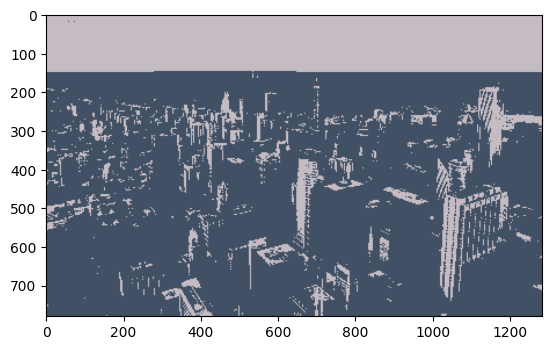

k =  5


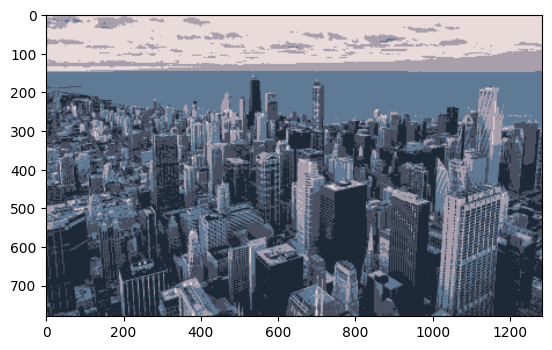

k =  10


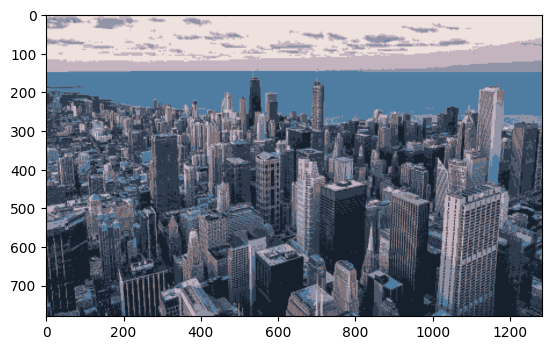

k =  50


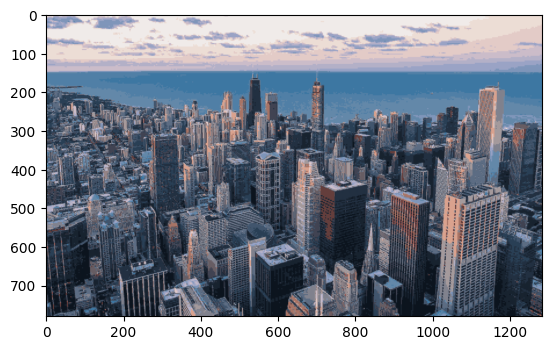

k =  200


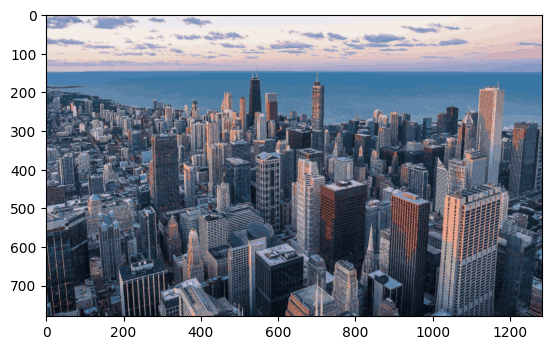

k =  500


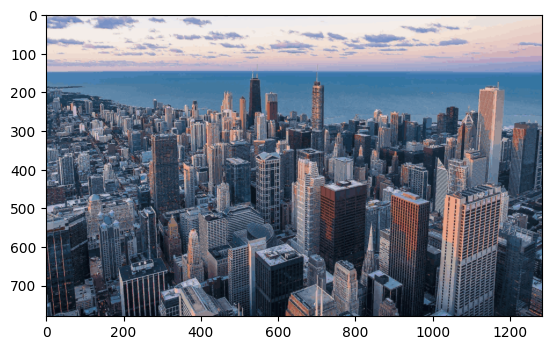

k =  1000


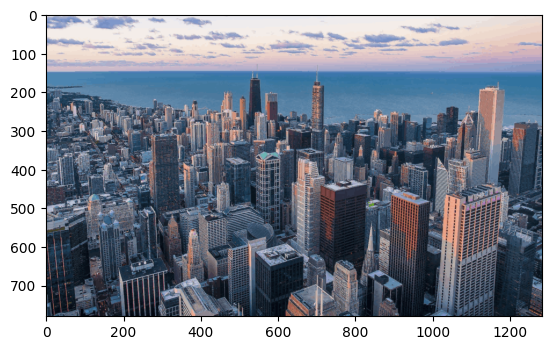

k =  2000


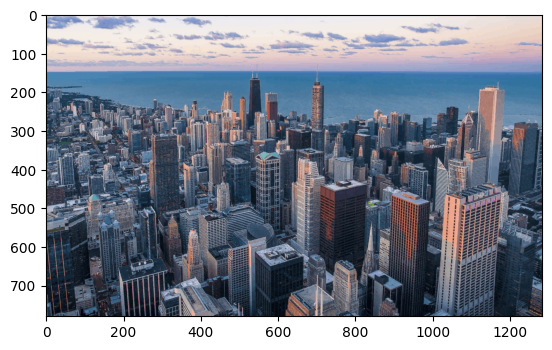

In [53]:
import sklearn.cluster

def find_chunk(y,x, img_x):
    return (y//3)*(img_x//3) + x//3

def flat_chunk(chunk):
    res = []
    for row in chunk:
        for pixel in row:
            for c in pixel:
                res.append(c.astype(np.float32))
    return res

k_list = [2, 5, 10, 50, 200, 500, 1000, 2000]
img = mpimg.imread('cityview.png') # colors between 0 and 1

# split image into 3 by 3 chunks
index_chunk_dict = {}
chunks = np.array([img[i:i+3, j:j+3] for i in range(0, img.shape[0], 3) for j in range(0, img.shape[1], 3) ])

# transform each chunk into a vector
matrix = np.array([flat_chunk(chunk) for chunk in chunks])


reconstructed_images = []
reconstructed_img = img.copy()

for k in k_list:
    
    reconstructed_img = img.copy()

    # apply k-means clustering
    centroids, label, inertia = sklearn.cluster.k_means(matrix, k)

    # reconstruct image
    for y in range(0, img.shape[0], 3):
        for x in range(0, img.shape[1], 3):
            chunk_index = find_chunk(y,x,img.shape[1])
            cluster_number = label[chunk_index]
            cluster_vector = centroids[cluster_number]
            reshaped_vector = cluster_vector.reshape(3, 3, 3)
            reconstructed_img[y:y+3, x:x+3] = reshaped_vector
           
    reconstructed_img = reconstructed_img.astype(np.float32)
    print("k = ", k)
    plt.imshow(reconstructed_img)
    plt.show()
    reconstructed_images.append(reconstructed_img.copy())
    



Question 3

In [54]:
recon_errors = {}
k_list = [2, 5, 10, 50, 200, 500, 1000, 2000]
for i, recon_img in enumerate(reconstructed_images):
    e = (img - recon_img)**2
    k = k_list[i]
    recon_errors[k] = e.mean()

print('k , mean squared error\n')
for item in recon_errors.items():
    print(item, '\n') 

k , mean squared error

(2, np.float32(0.028688248)) 

(5, np.float32(0.012967184)) 

(10, np.float32(0.009750629)) 

(50, np.float32(0.0054576797)) 

(200, np.float32(0.0036261887)) 

(500, np.float32(0.002817617)) 

(1000, np.float32(0.0023217162)) 

(2000, np.float32(0.0018872514)) 



Question 4

In [55]:

# need chunk array - 111280
# need label array - 111280 ??
# need array centroids of size k * 27

# original size is 111,280 (chunks) elements of size 27
# new size is 111,280 (chunks) elements matched to one of k clusters of size 27
# before, each chunk had 27 unique numbers associated with it
# now, multiple chunks are matched to a single cluster vector of size 27 out of k clusters

# now, k * 27 + 111280 * 1 (now each chunk has a single cluter index associated with it, instead of 27. Each index is associated with a vector of 27 numbers)



compressed_sizes = {}
print("k : total numbers\n")
for k in k_list:
    compressed_sizes[k] = k*27 + 1 * 111280
    print(k, ':', k * 27 + 1 * 111280, '\n')

k : total numbers

2 : 111334 

5 : 111415 

10 : 111550 

50 : 112630 

200 : 116680 

500 : 124780 

1000 : 138280 

2000 : 165280 



Question 5

In [56]:
# Compression rate = compressed size / original size

original_size = 1284 * 780 * 3
print("k : compression rate\n")
for k in k_list:
    print(k, ':', compressed_sizes[k] / original_size, '\n')

k : compression rate

2 : 0.03705500971856112 

5 : 0.037081968740847245 

10 : 0.037126900444657454 

50 : 0.037486354075139124 

200 : 0.038834305189445376 

500 : 0.041530207418057886 

1000 : 0.04602337779907873 

2000 : 0.05500971856112043 



Question 6

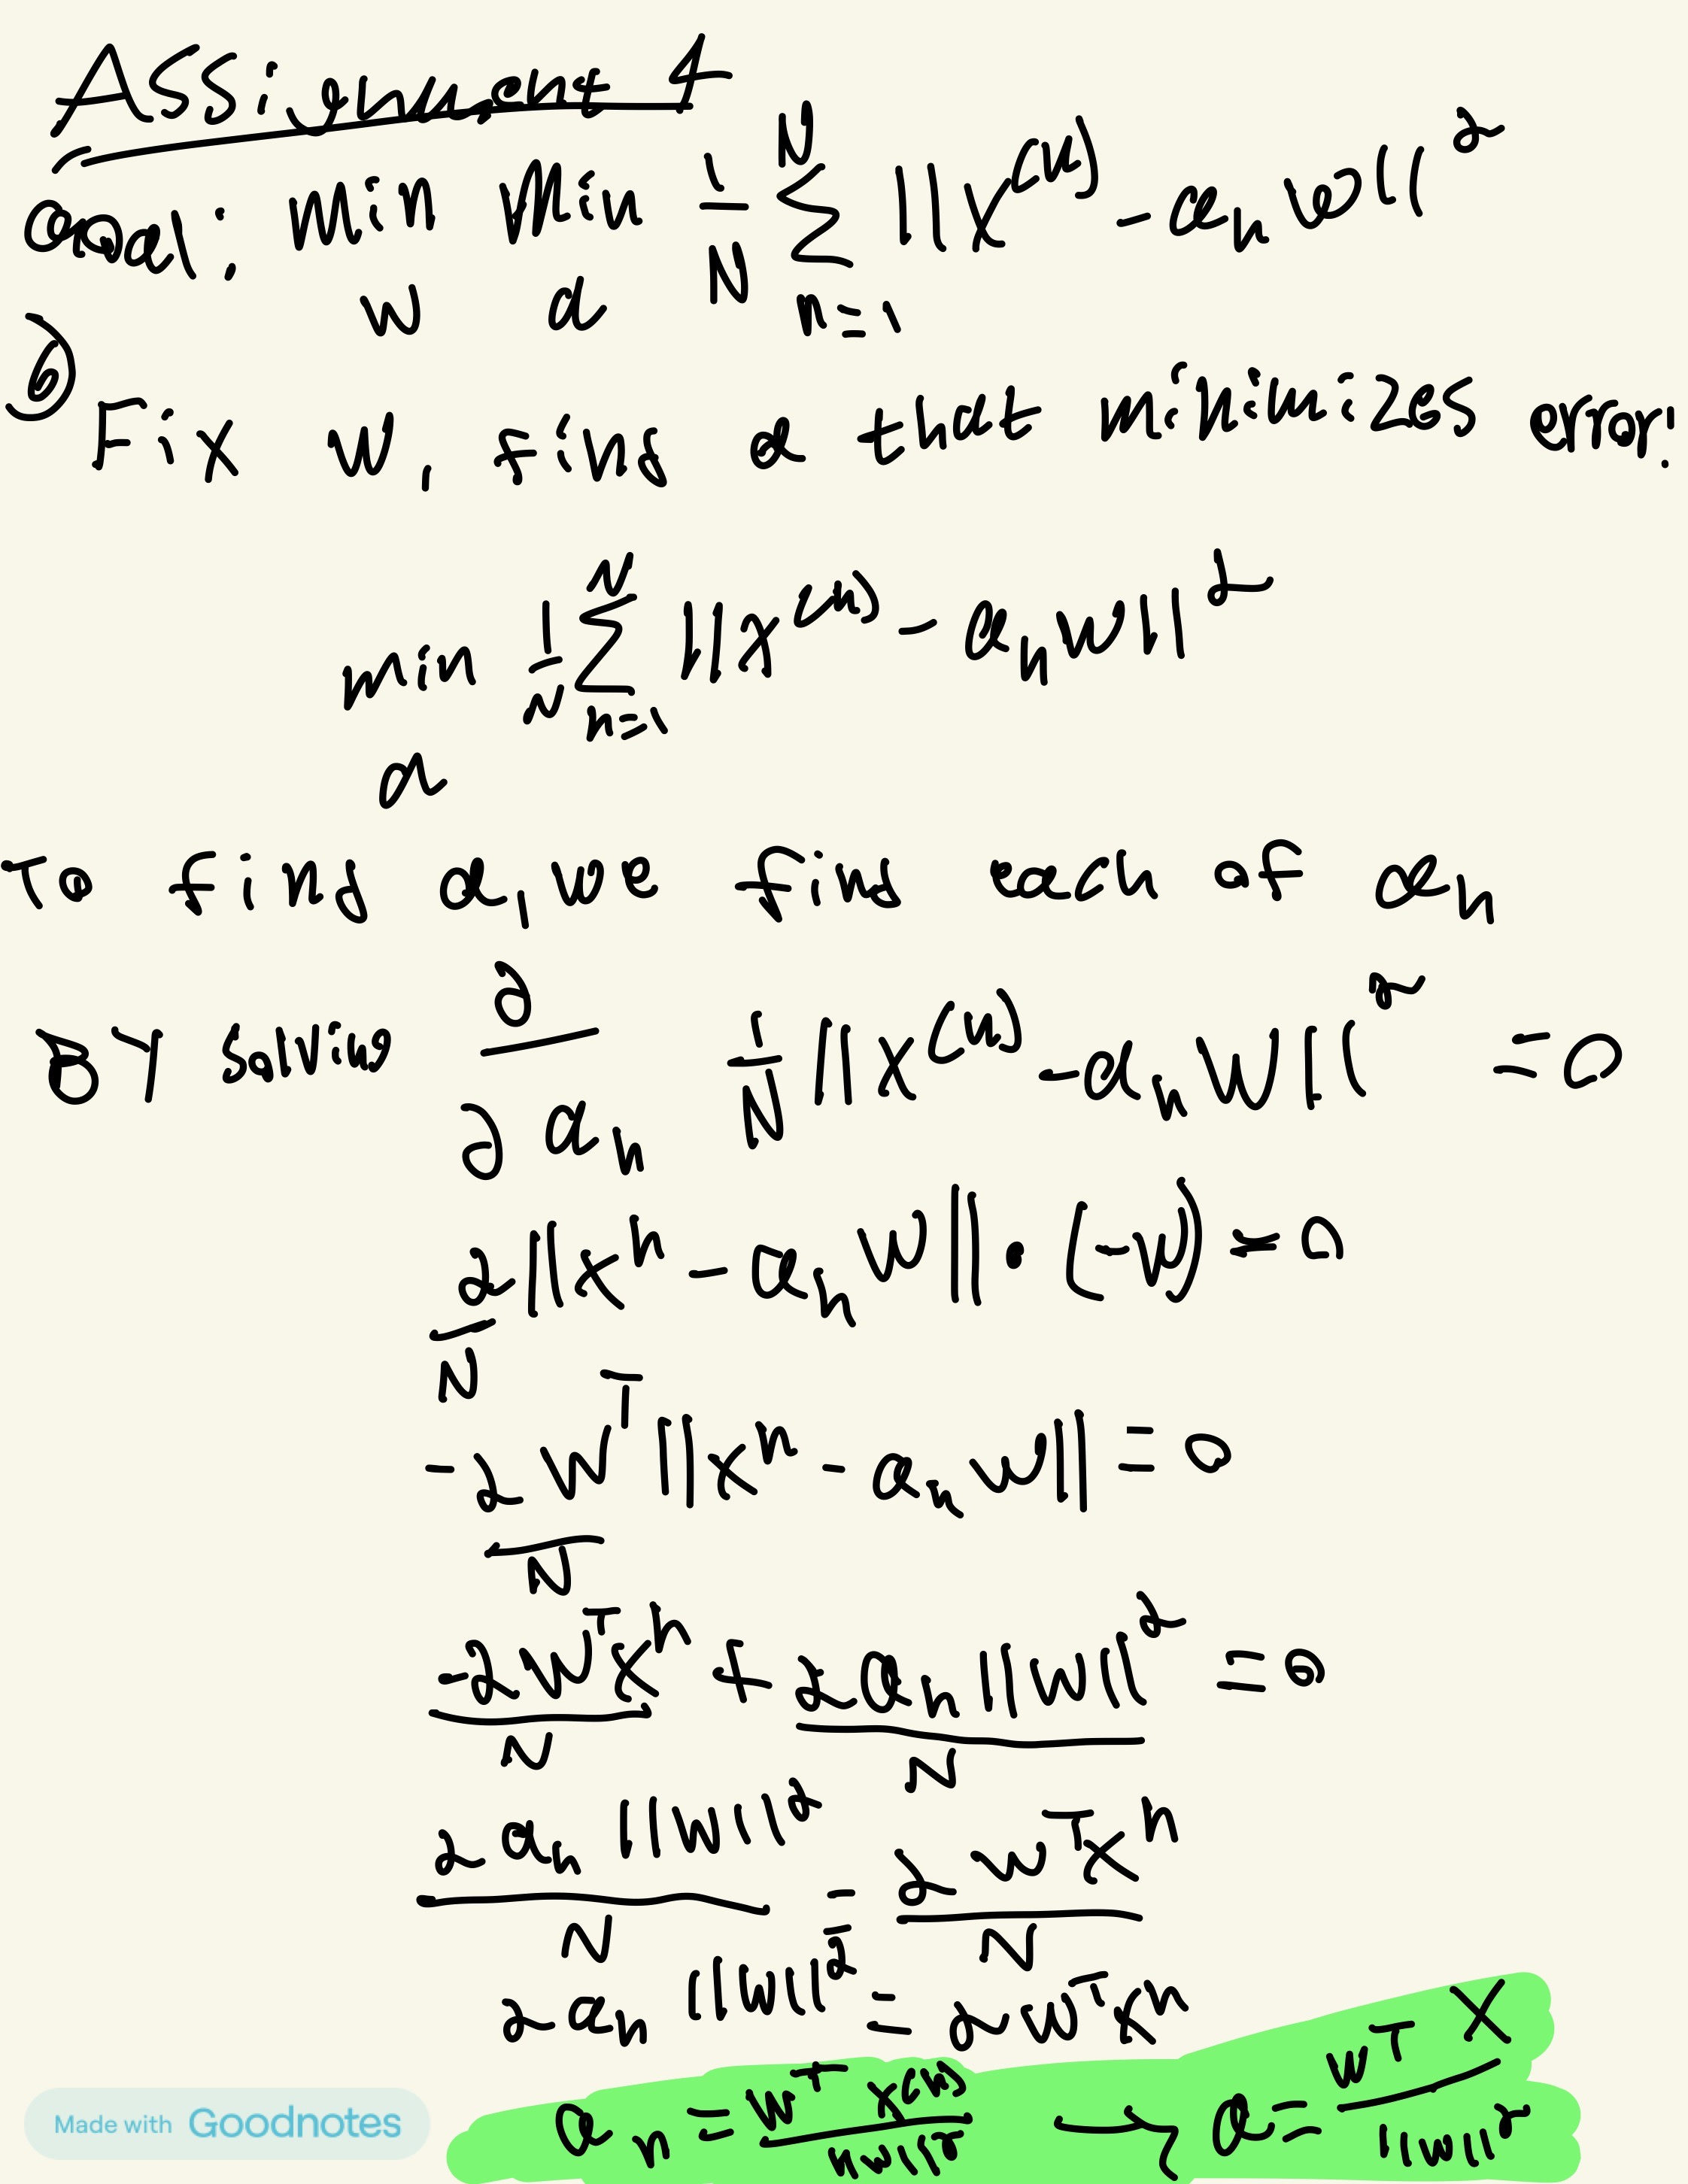

In [57]:
from IPython.display import Image
Image(filename='IMG_0043.jpg', width=800)

Question 7

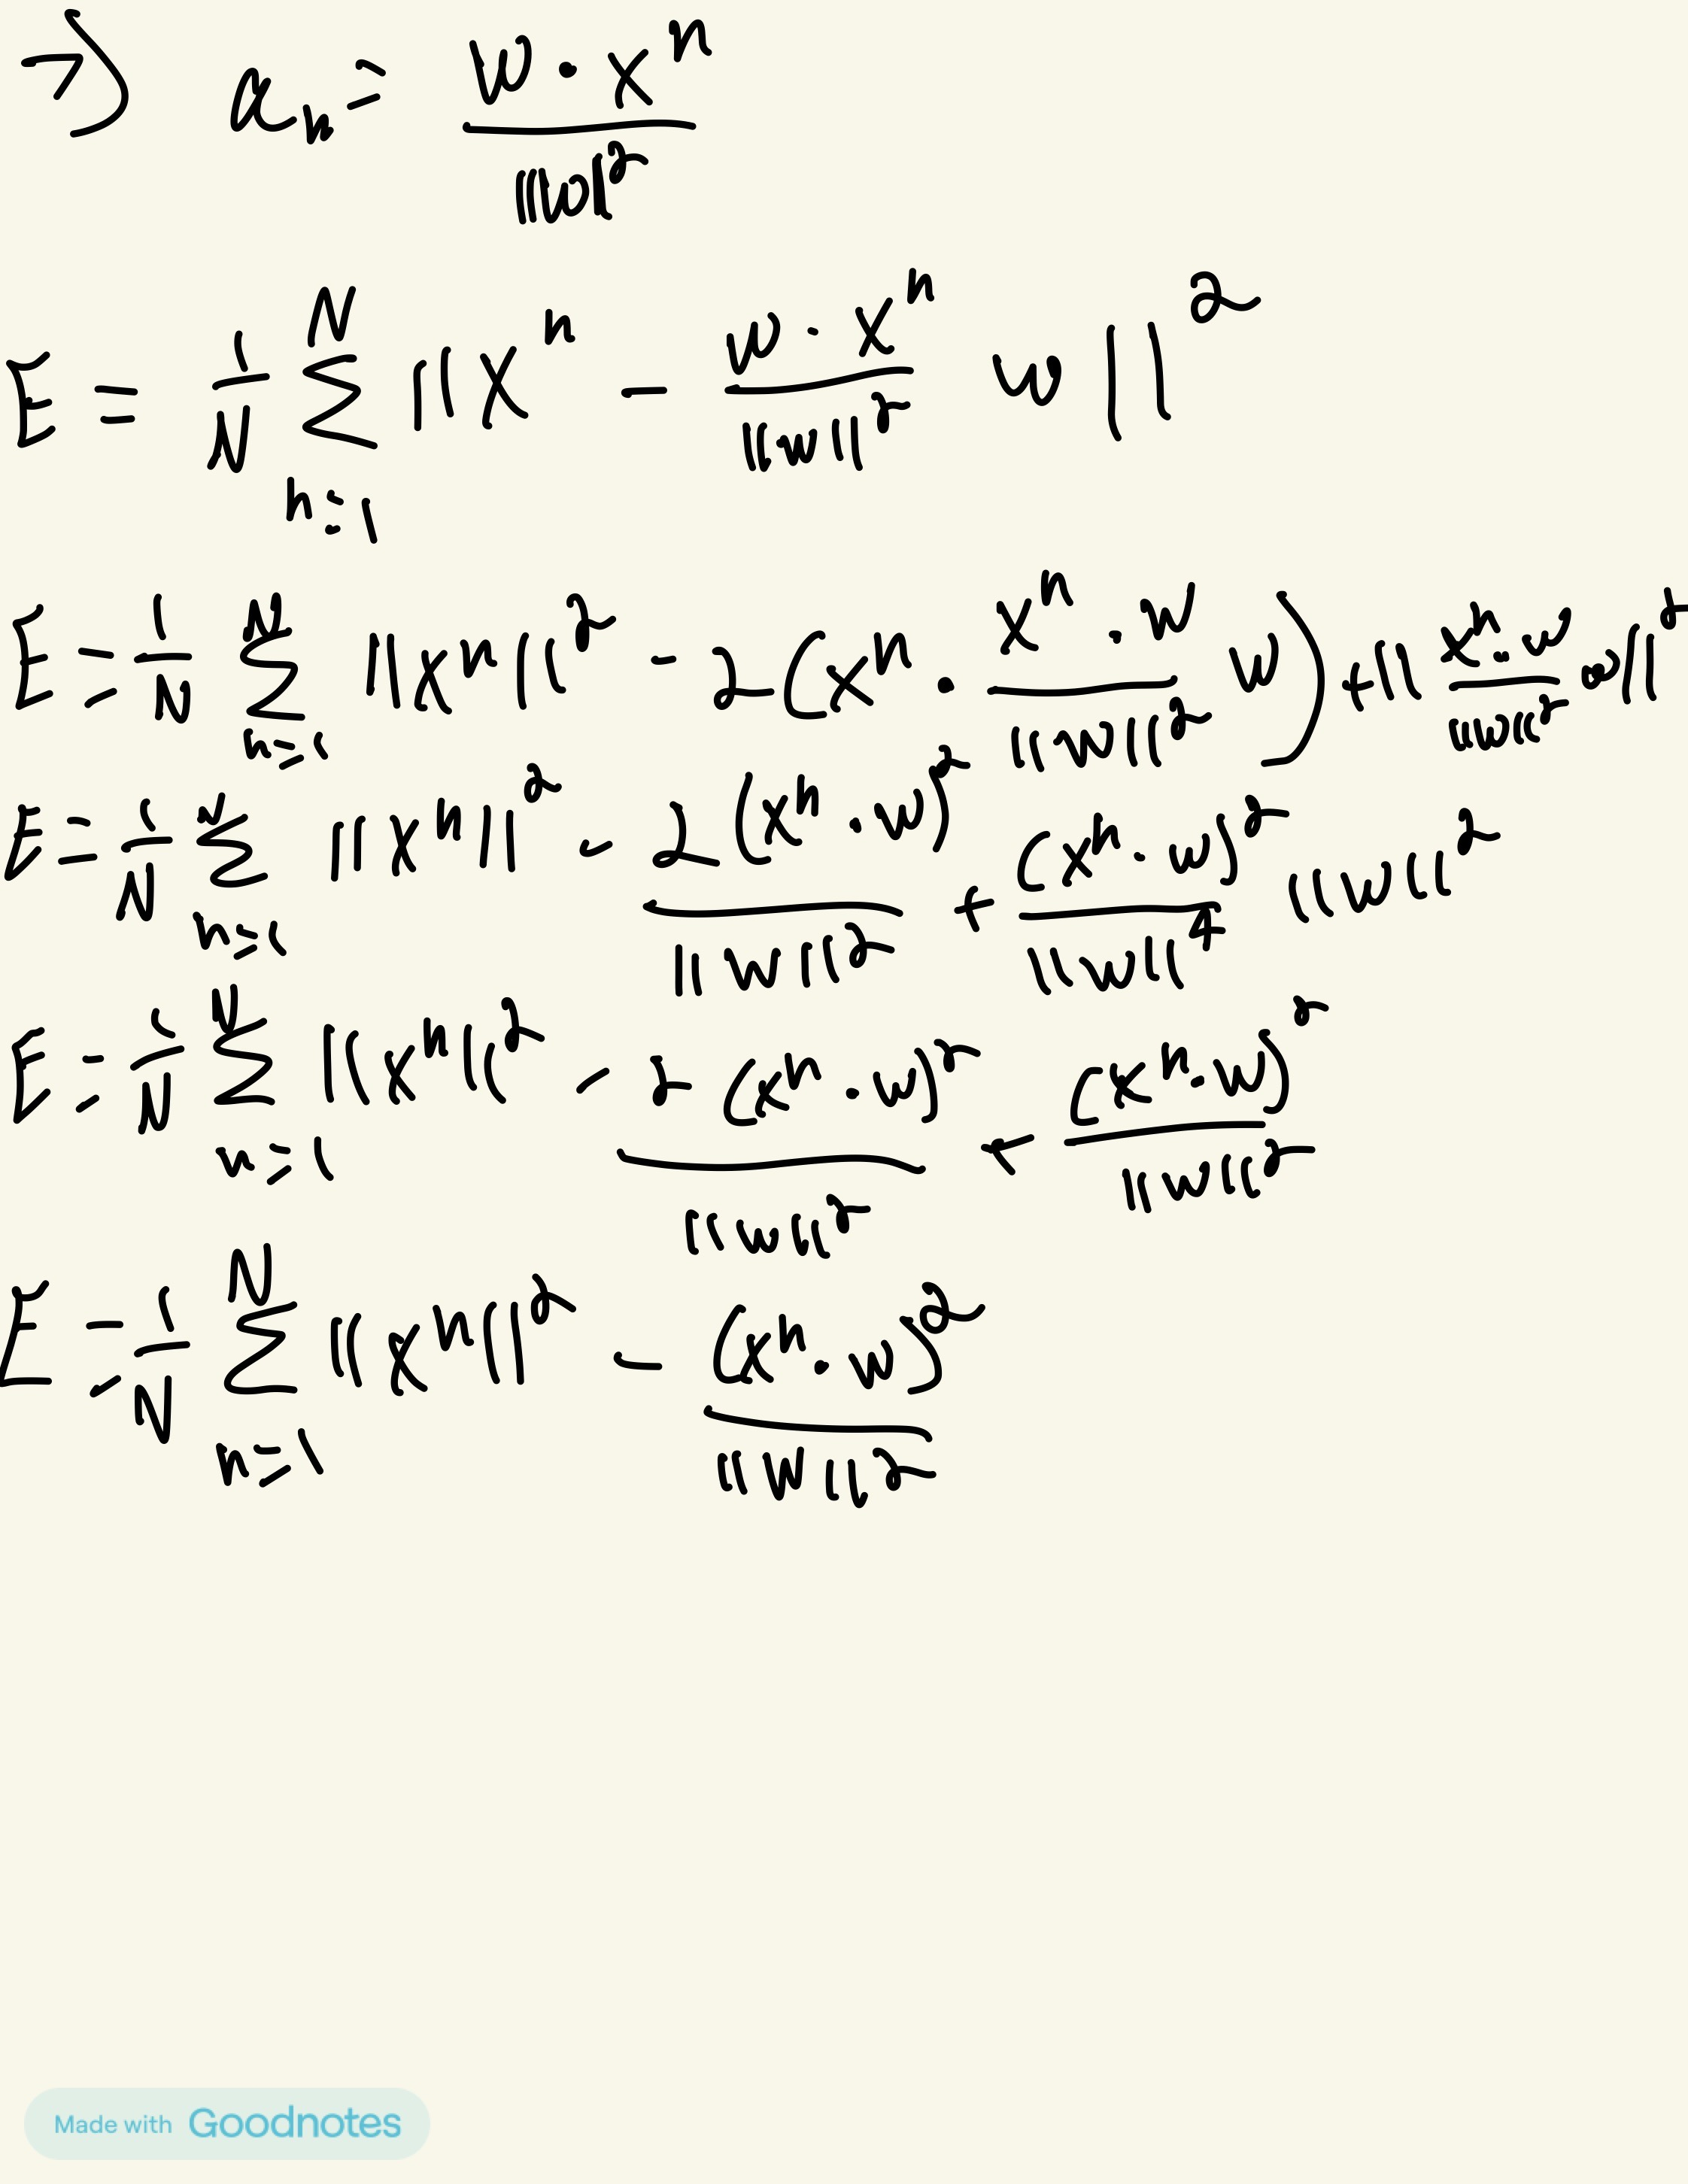

In [58]:
Image(filename='IMG_0044.jpg', width=800)

Question 8

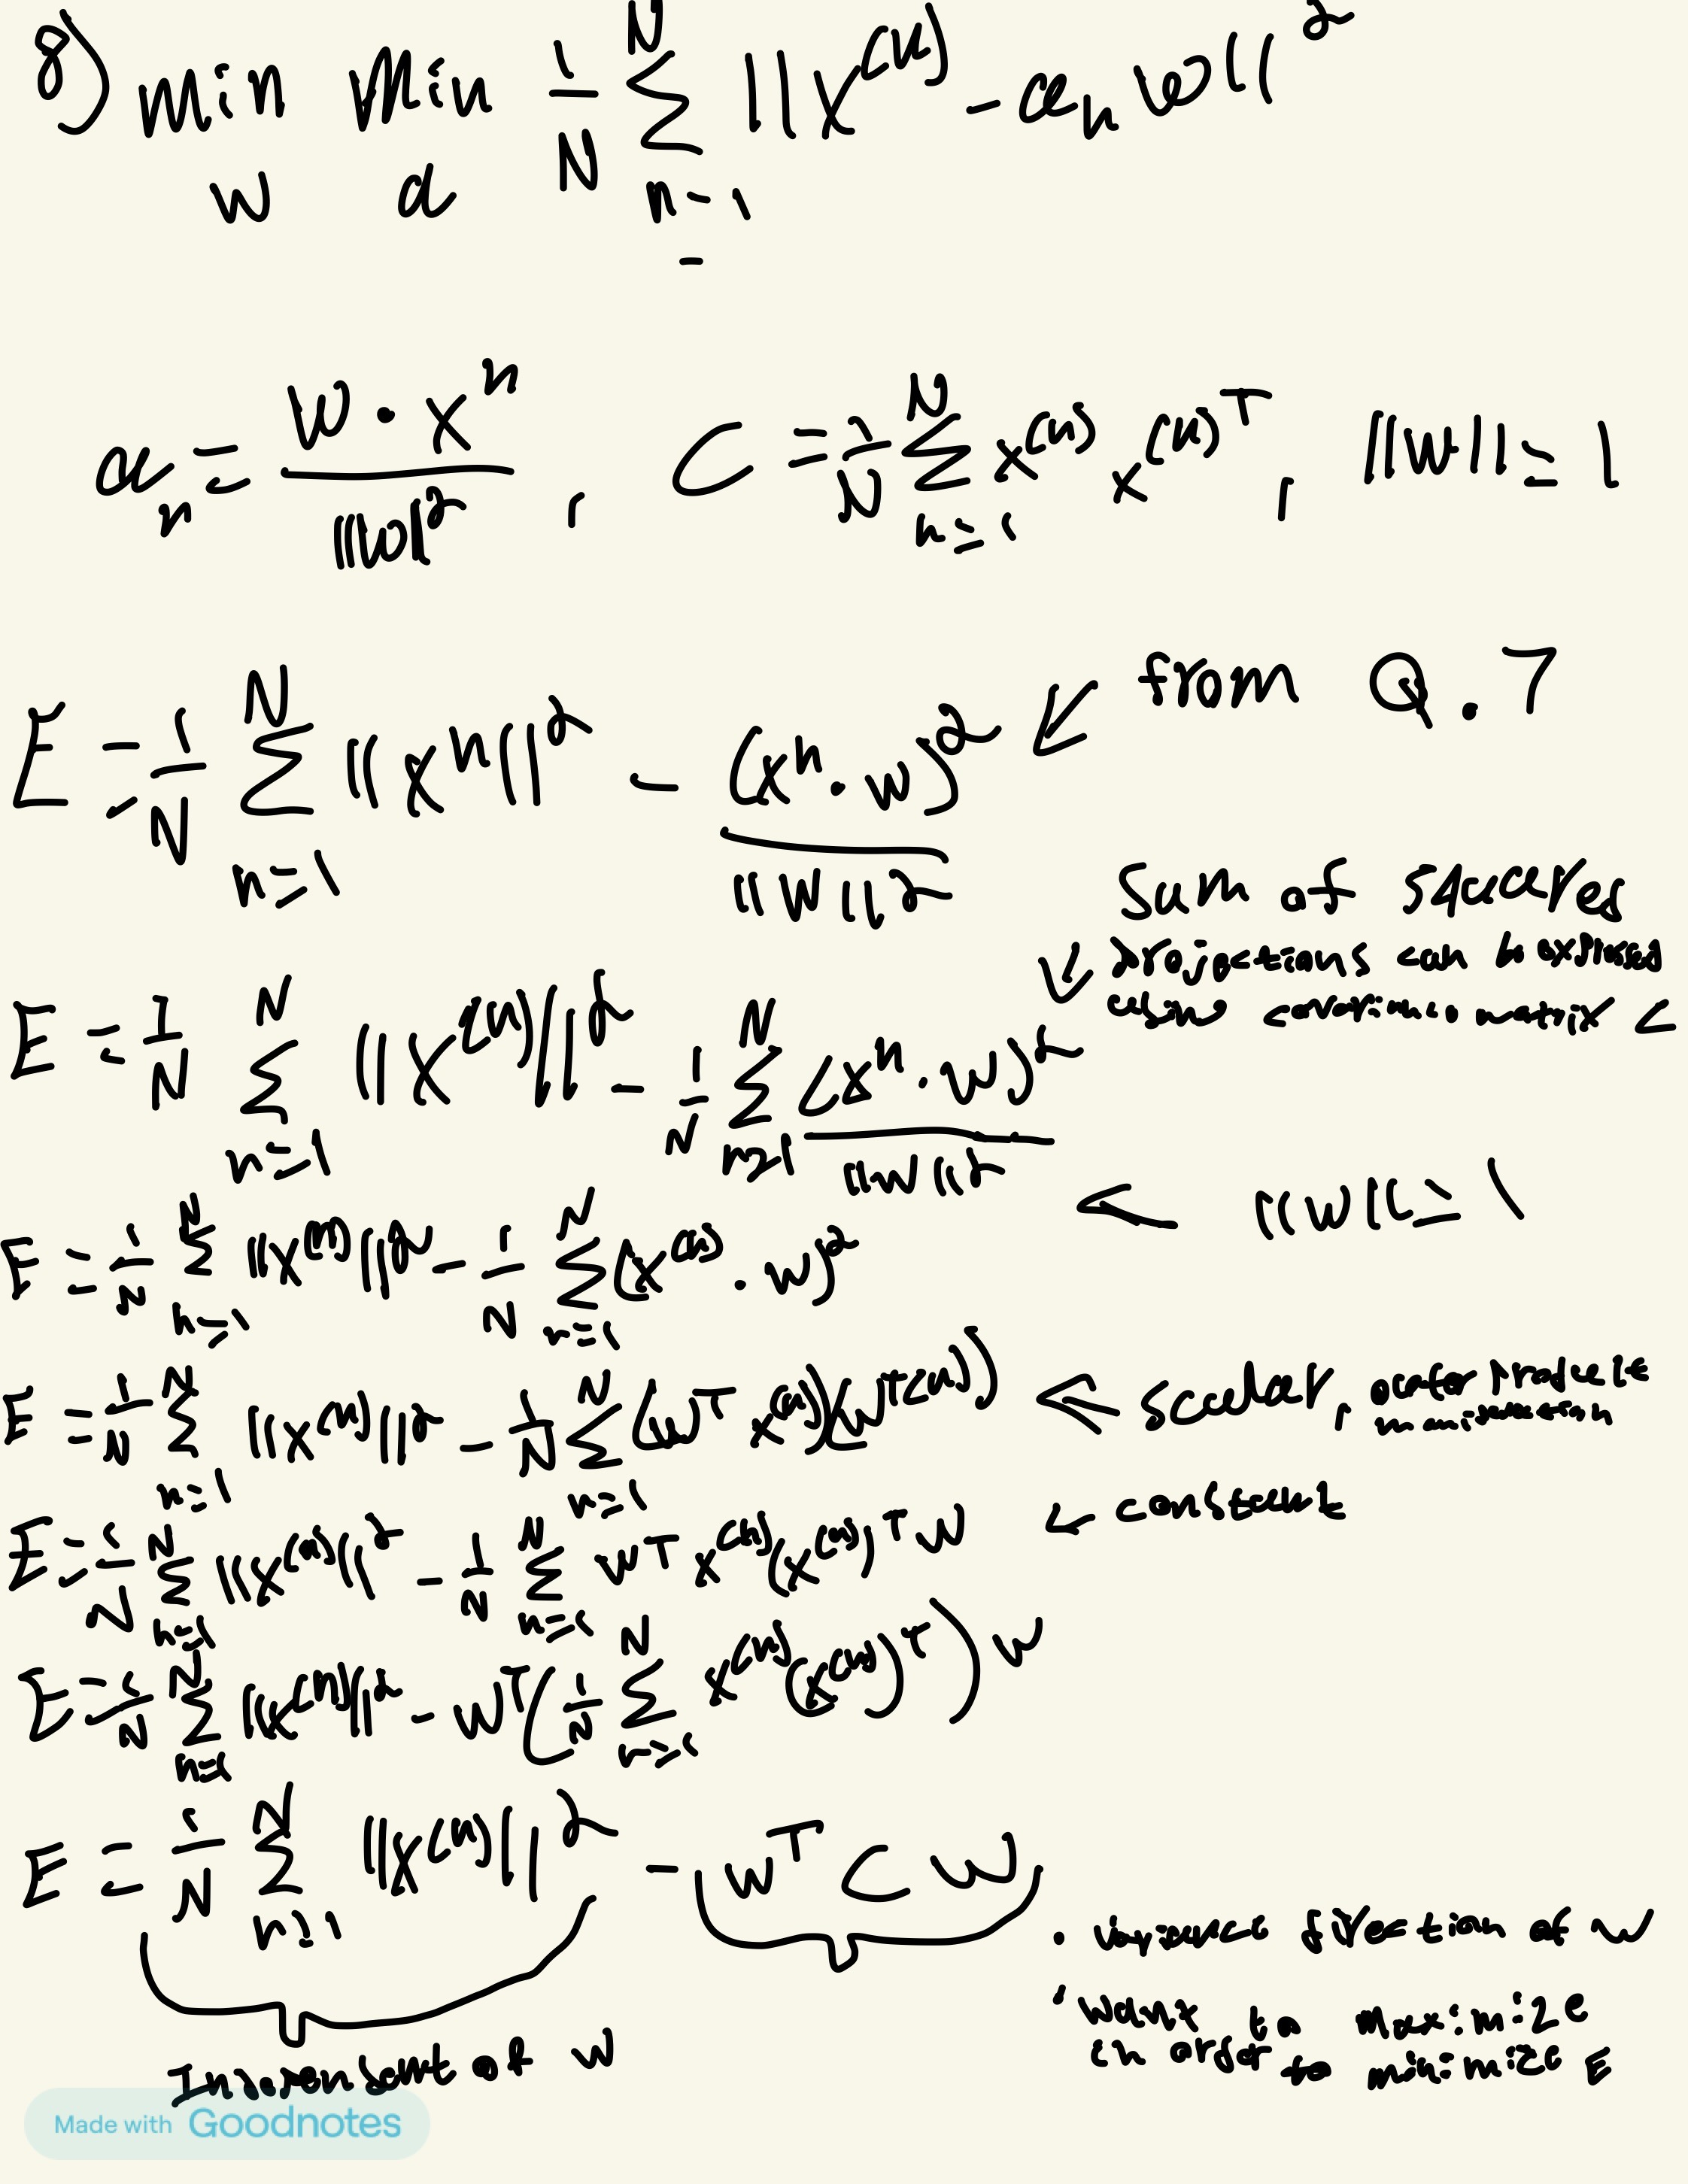

In [59]:
Image(filename='IMG_0045.jpg', width=800)

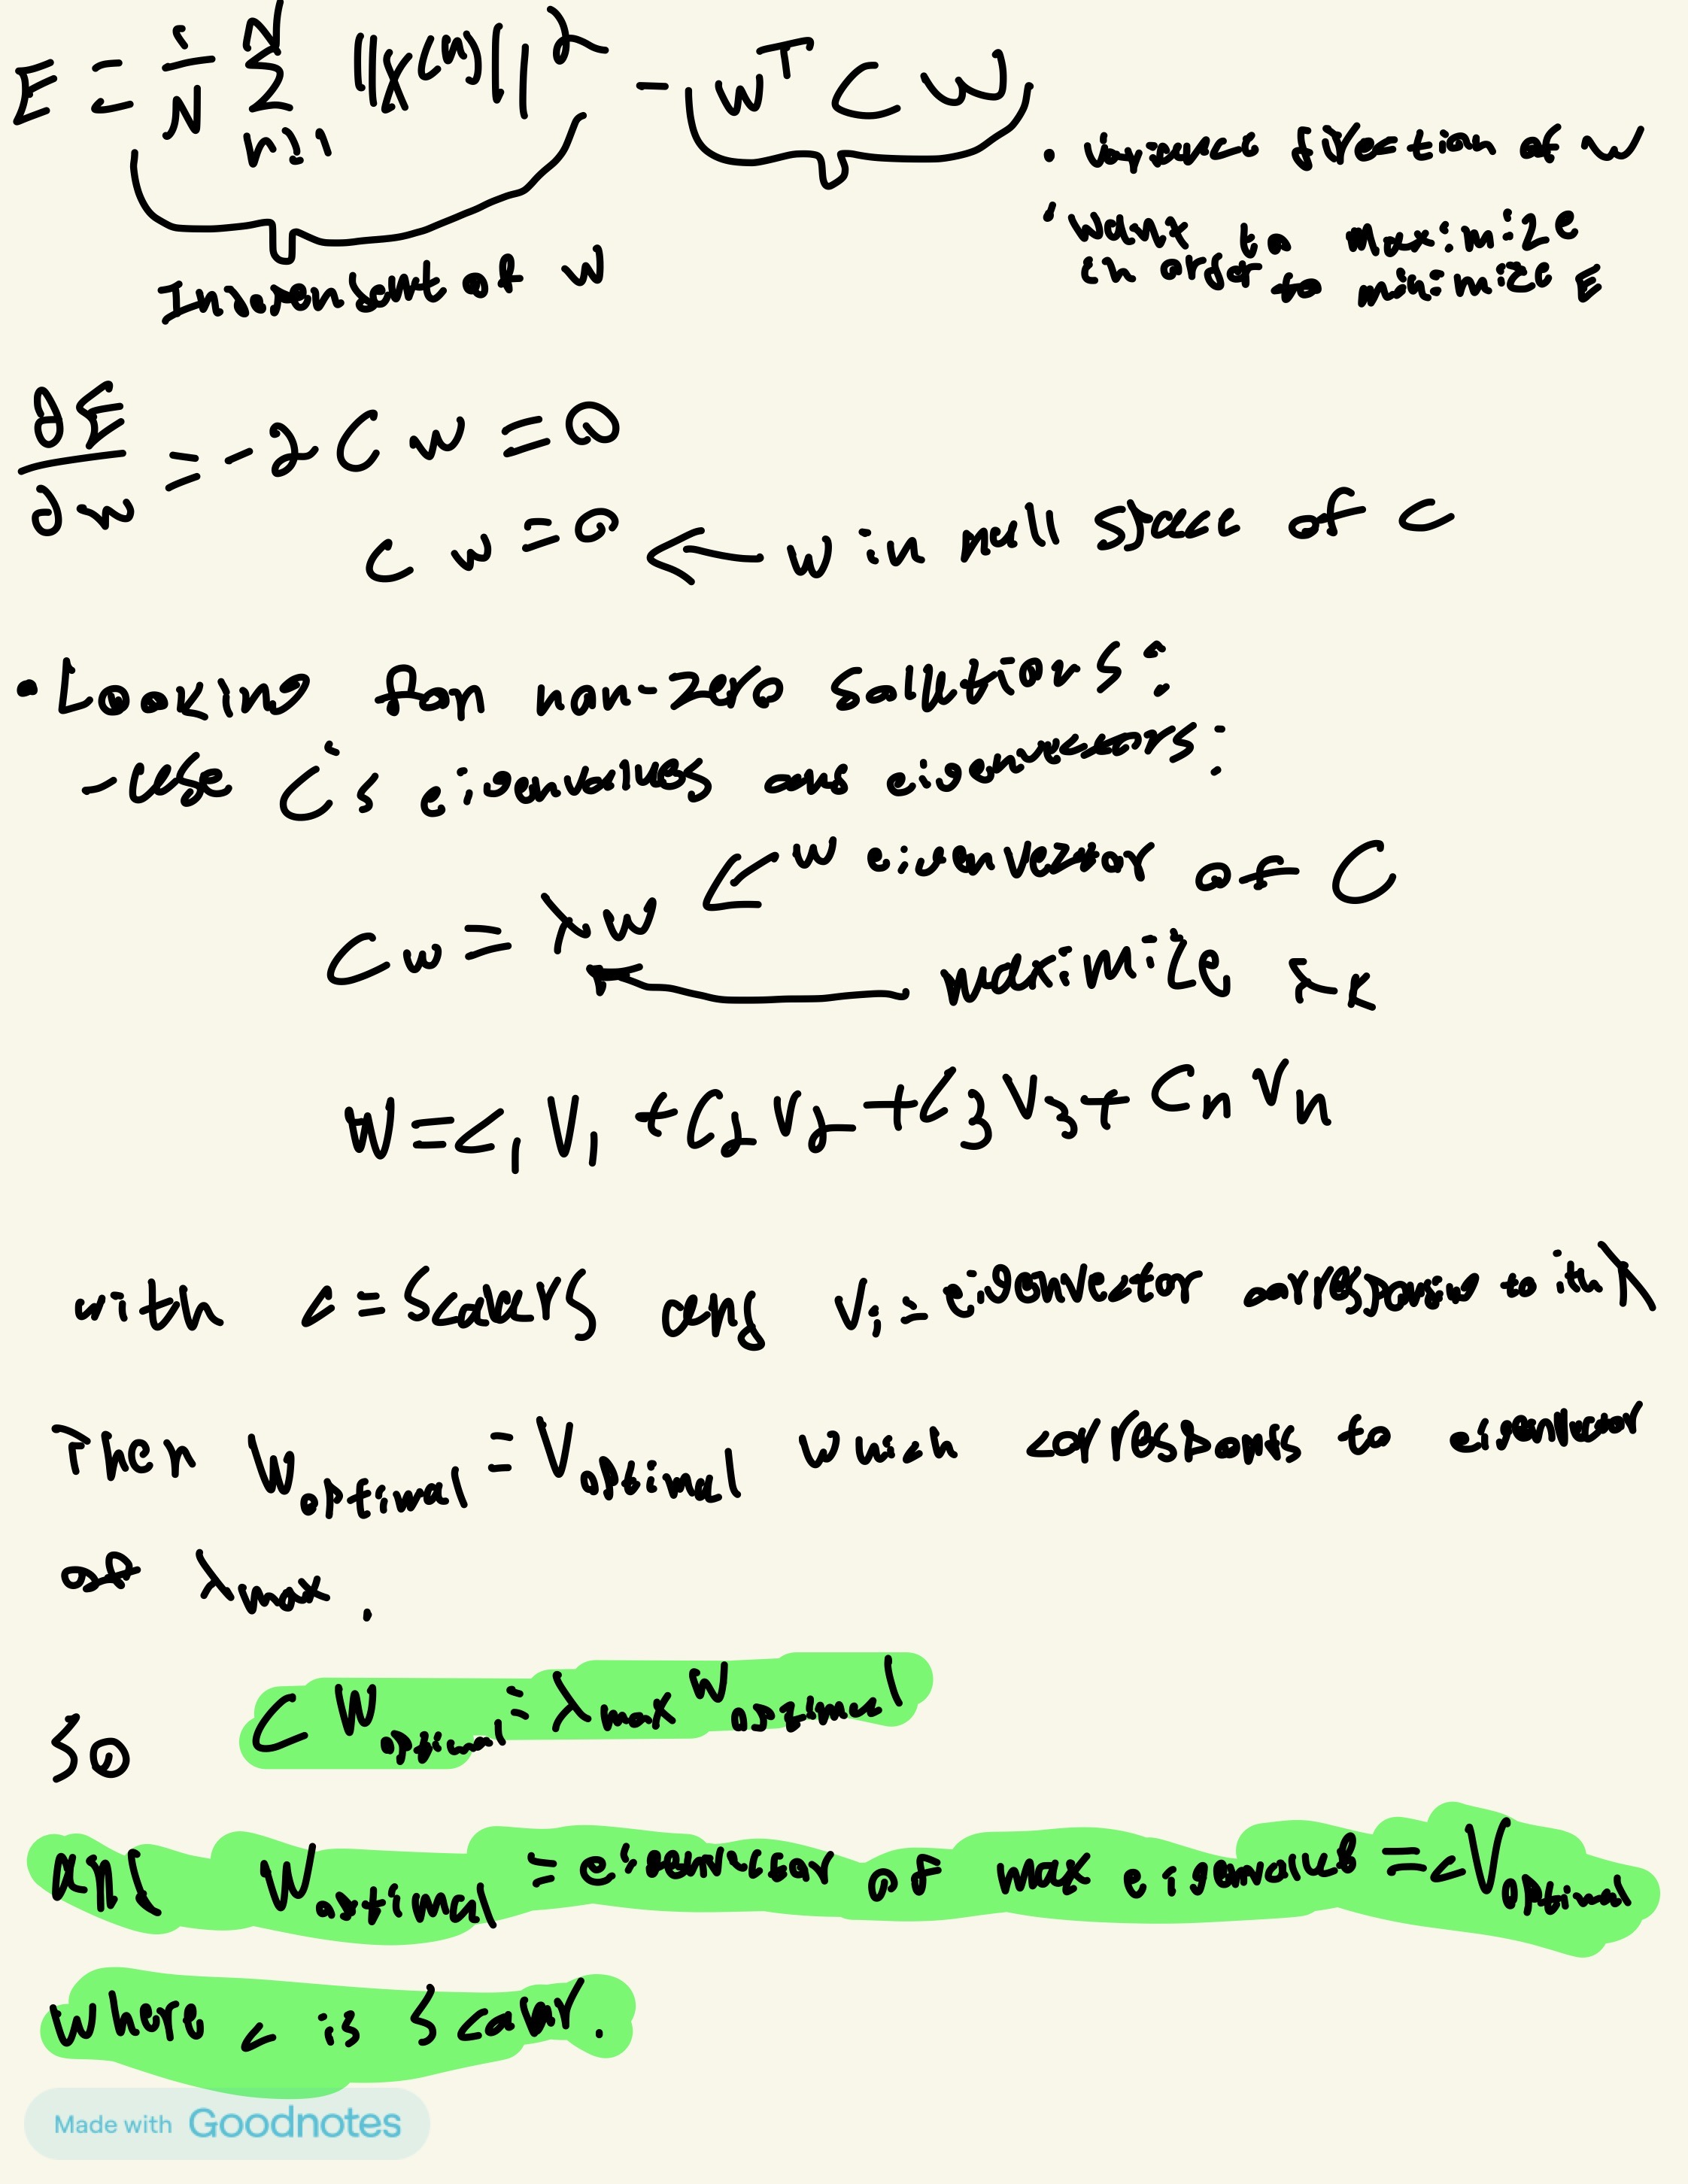

In [60]:
Image(filename='IMG_0046.jpg', width=800)

Question 9

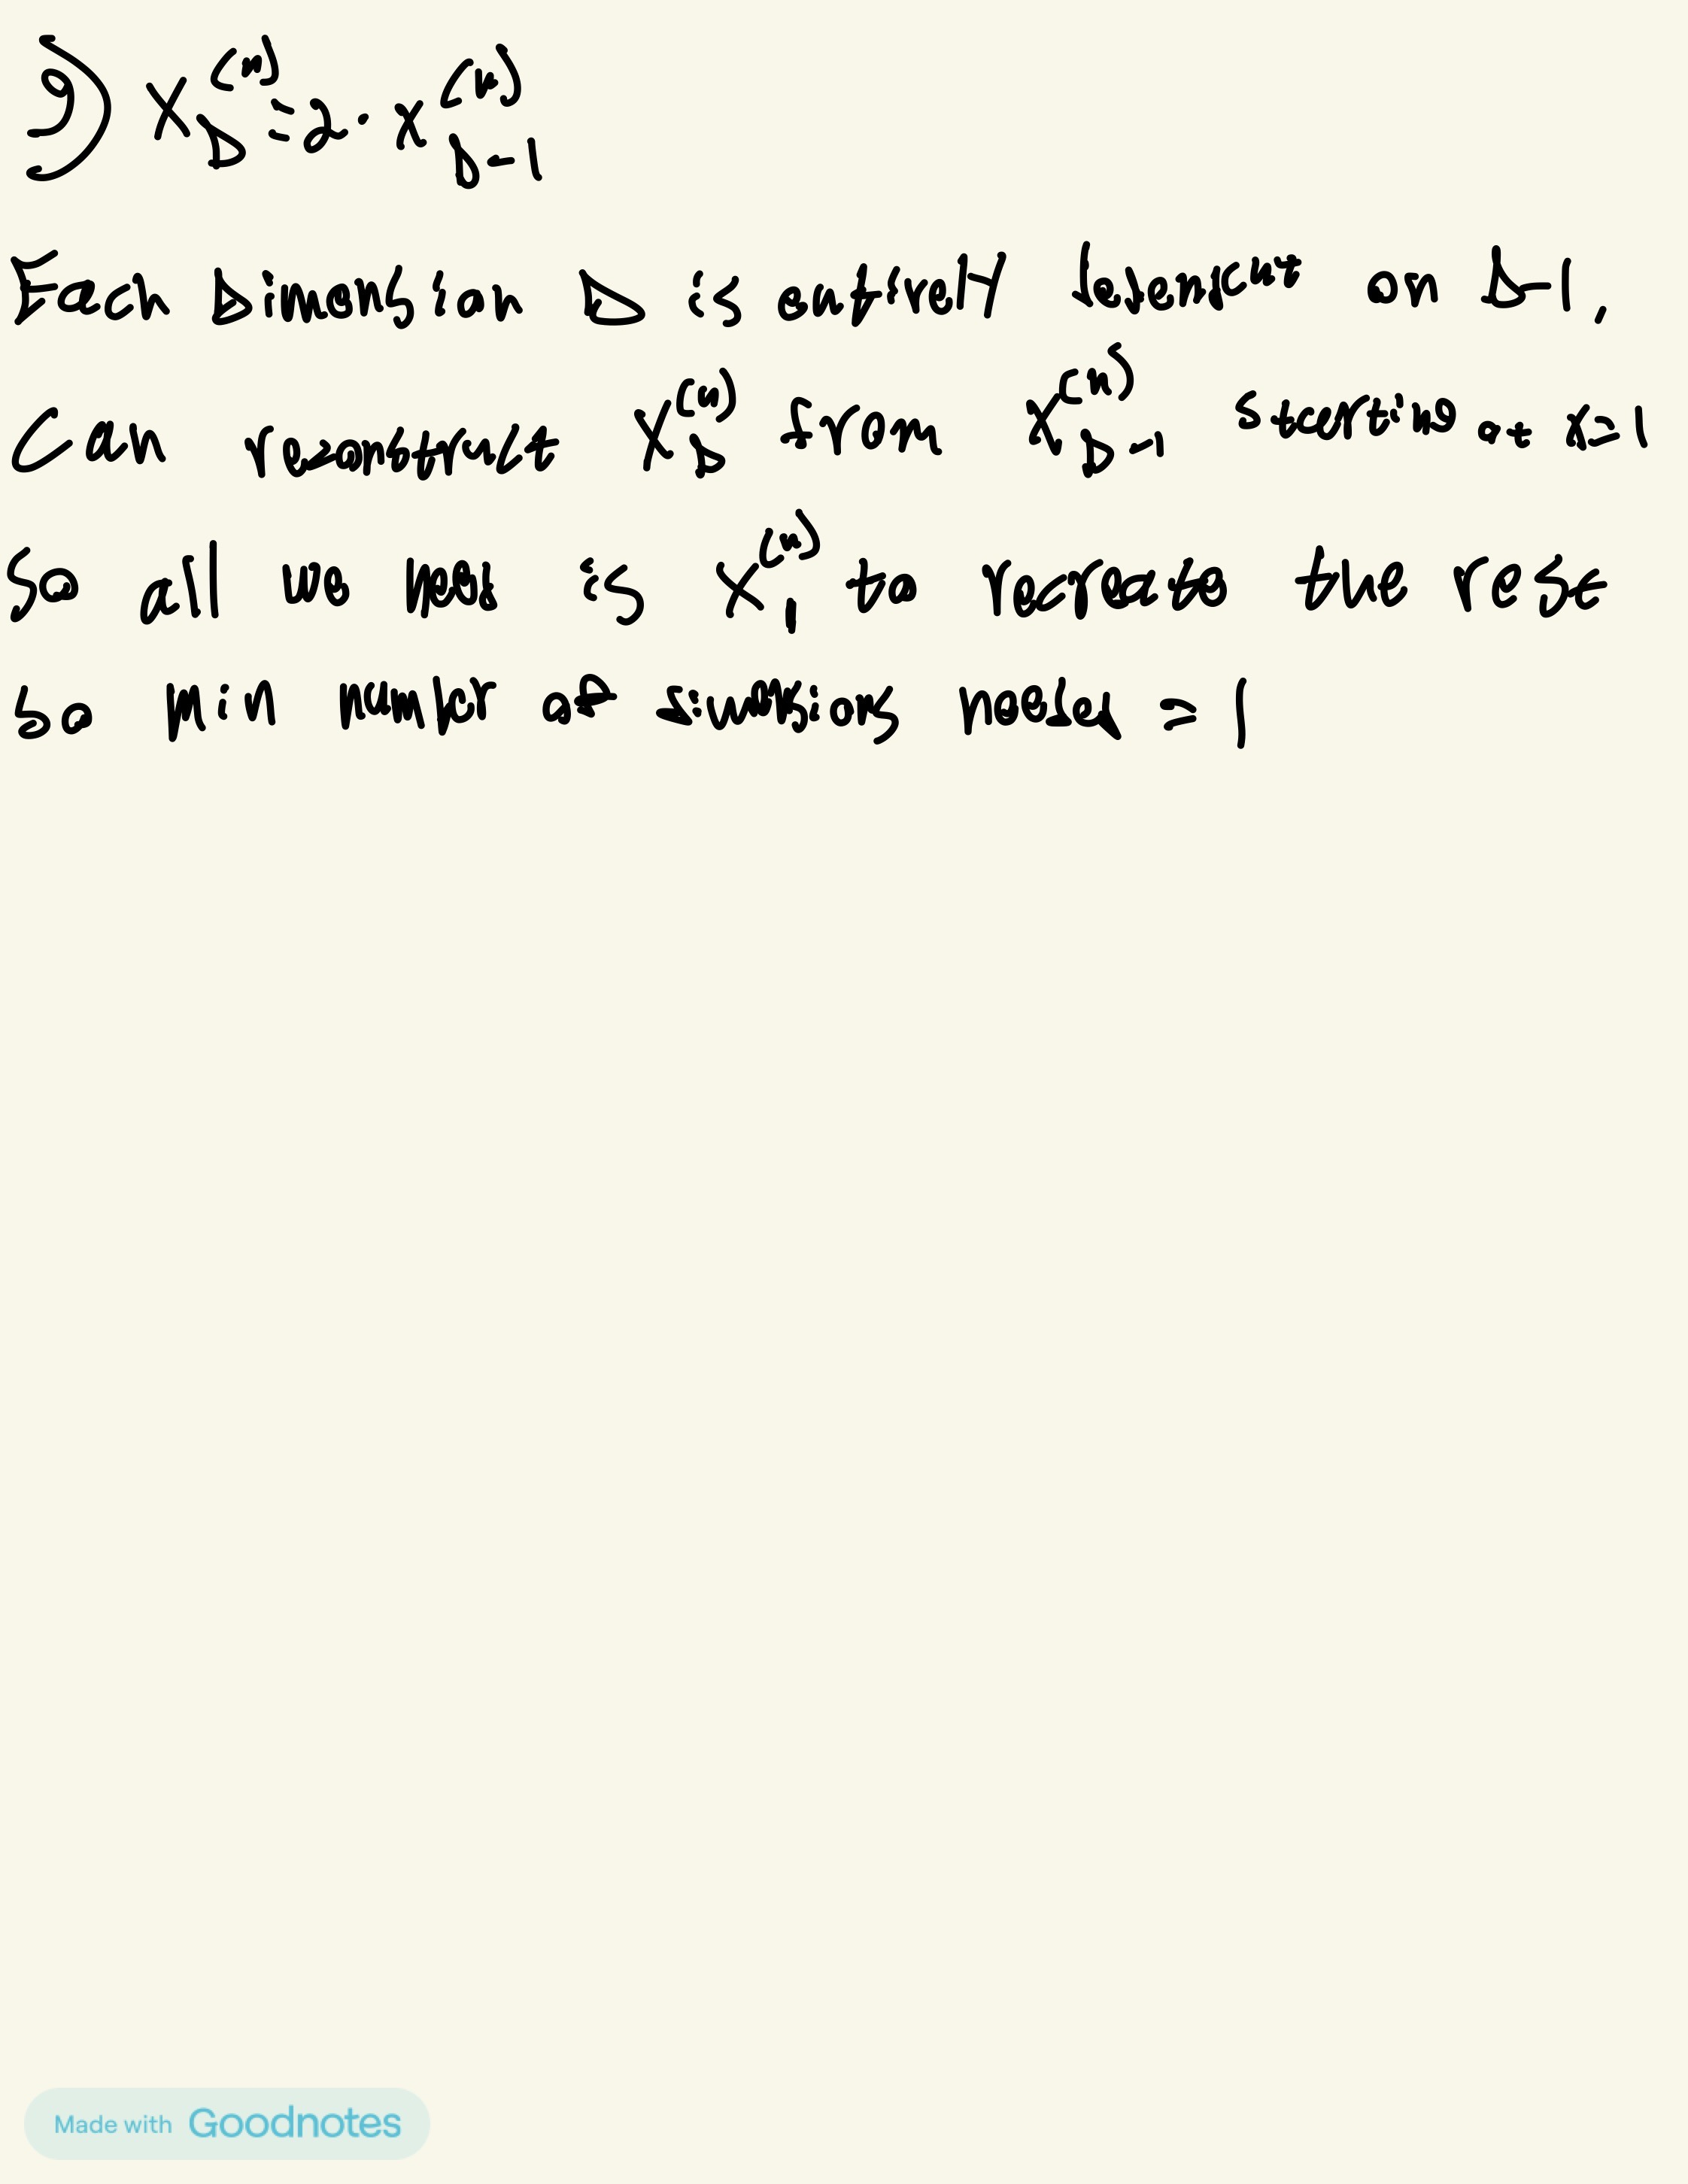

In [61]:
Image(filename='IMG_0047.jpg', width=800)

Question 10

original image


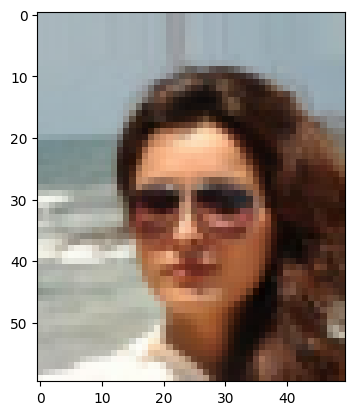

k =  3


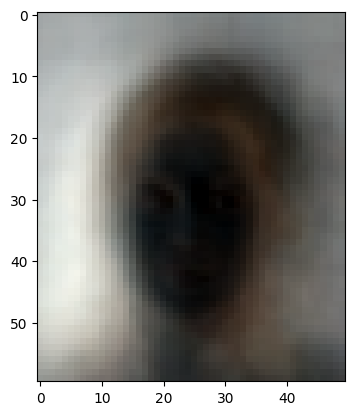

k =  5


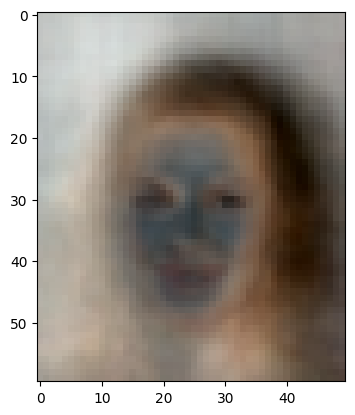

k =  10


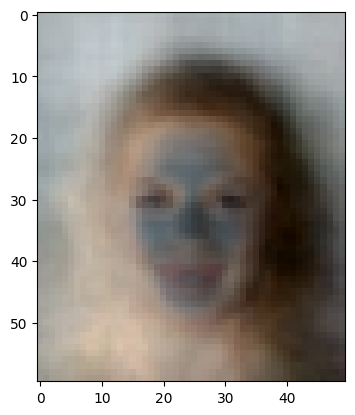

k =  30


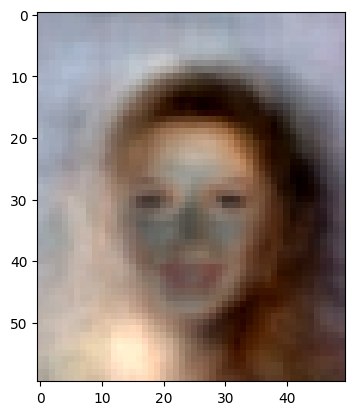

k =  50


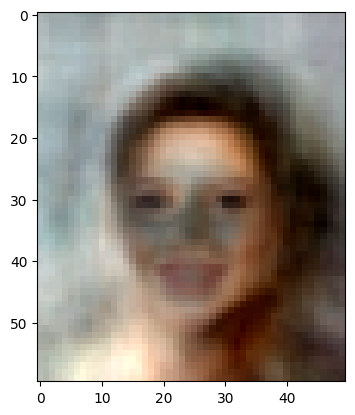

k =  100


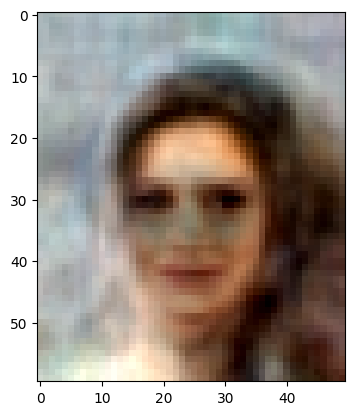

k =  200


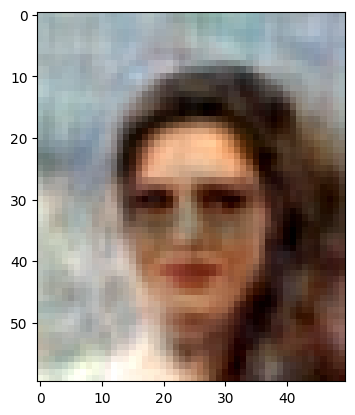

k =  500


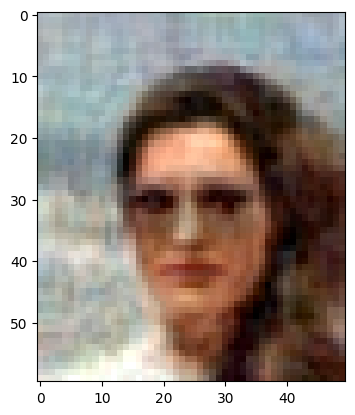

k =  1000


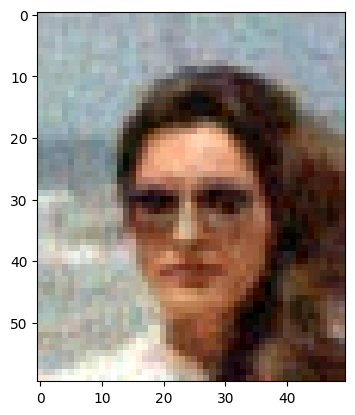

In [62]:
original_img = mpimg.imread('portrait.png') # load img
print("original image")
plt.imshow(original_img)
plt.show()
original_img_vector = original_img.flatten() # turn image to vector of 9000 dimensions
k_list = [3, 5, 10, 30, 50, 100, 200, 500, 1000]
# get mean of all images in portraits folder
image_vectors= []
for i in range(1000):
    img = mpimg.imread('portraits/portrait_' + str(i) + '.png')
    img_vector = img.flatten()
    image_vectors.append(img_vector)


# get cov matrix
image_vectors = np.array(image_vectors)
cov_matrix = np.cov(image_vectors, rowvar=False)

# get eigenvectors
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eig_vals)[::-1]  # Get indices of sorted eigenvalues in descending order
eig_vals = eig_vals[sorted_indices]  # Sort eigenvalues
eig_vecs = eig_vecs[:, sorted_indices]  # Sort eigenvectors according to eigenvalues


for k in k_list:

    # project original image onto k eigenvectors
    y = []
    for j in range(k):
        eigen_vector = eig_vecs[:, j]
        y.append(np.dot(eigen_vector.T, original_img_vector))
    
    # reconstruct original image
    reconstructed_img = [float(0) for i in range(9000)]
    for j in range(len(y)):
        reconstructed_img += (y[j] * eig_vecs[:, j])
    reconstructed_img = np.array(reconstructed_img)
    # scale all numbers to (0-1)
    reconstructed_img = np.clip(reconstructed_img, 0, 1)
    reconstructed_img = reconstructed_img.reshape(60,50,3)
    print("k = ", k)
    plt.imshow(reconstructed_img)
    plt.show()

Question 11

In [63]:
compressed_sizes = {}
for k in k_list:
    compressed_sizes[k] = k * 1000  + k * 9000

# Compression rate = compressed size / original size

original_size = 1000 * 60 * 50 * 3 # 1000 images 
print("k : compression rate\n")
for k in k_list:
    print(k, ':', compressed_sizes[k] / original_size, '\n')

k : compression rate

3 : 0.0033333333333333335 

5 : 0.005555555555555556 

10 : 0.011111111111111112 

30 : 0.03333333333333333 

50 : 0.05555555555555555 

100 : 0.1111111111111111 

200 : 0.2222222222222222 

500 : 0.5555555555555556 

1000 : 1.1111111111111112 

